In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

%matplotlib inline

In [2]:
X, y = datasets.make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
print("Training SVM with Linear Kernel...")
linear_svm = SVC(kernel='linear', probability=True, random_state=42)
linear_svm.fit(X_train, y_train)

y_pred_linear = linear_svm.predict(X_test)
y_prob_linear = linear_svm.predict_proba(X_test)[:, 1]

print("\n--- Linear SVM Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_linear):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_linear):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_prob_linear):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

Training SVM with Linear Kernel...

--- Linear SVM Performance ---
Accuracy: 0.8667
Precision: 0.8000
Recall: 0.9231
AUC Score: 0.9242
Confusion Matrix:
 [[28  6]
 [ 2 24]]


In [4]:
print("\nTraining SVM with RBF Kernel...")
rbf_svm = SVC(kernel='rbf', probability=True, random_state=42)
rbf_svm.fit(X_train, y_train)

y_pred_rbf = rbf_svm.predict(X_test)
y_prob_rbf = rbf_svm.predict_proba(X_test)[:, 1]

print("\n--- RBF SVM Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rbf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rbf):.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_prob_rbf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Training SVM with RBF Kernel...

--- RBF SVM Performance ---
Accuracy: 0.8500
Precision: 0.7742
Recall: 0.9231
AUC Score: 0.9536
Confusion Matrix:
 [[27  7]
 [ 2 24]]


In [5]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Visualizing decision boundaries...


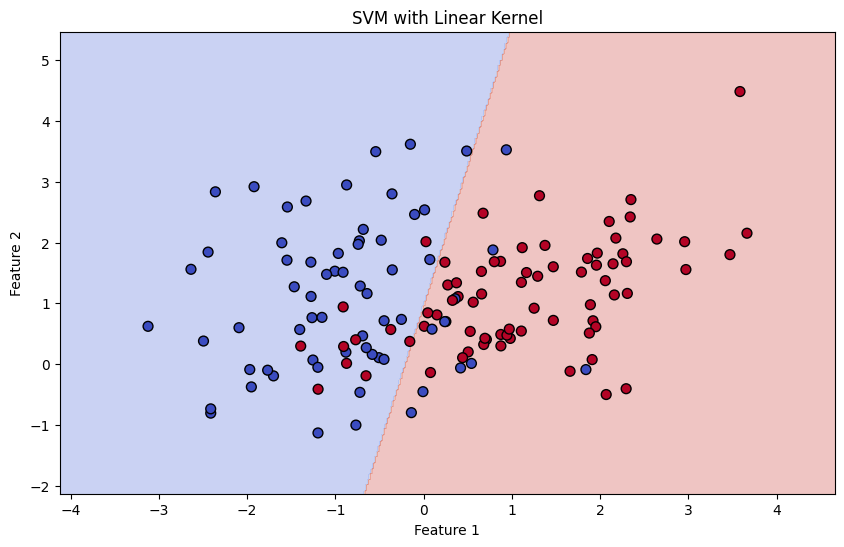

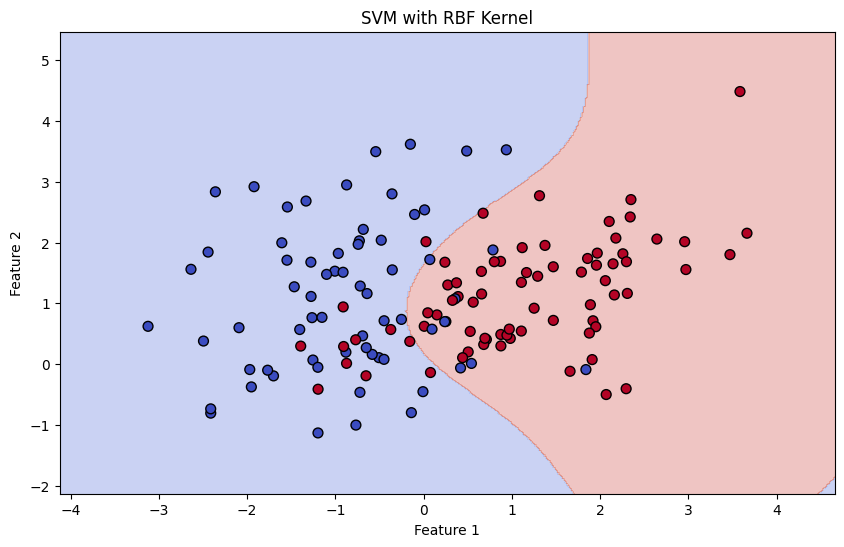

In [6]:
print("\nVisualizing decision boundaries...")
plot_decision_boundary(linear_svm, X_train, y_train, 'SVM with Linear Kernel')
plot_decision_boundary(rbf_svm, X_train, y_train, 'SVM with RBF Kernel')